In [1]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [2]:
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import *
from qiskit.quantum_info import state_fidelity
from qiskit import *

# 1. The QASM Simulator is the main Qiskit Aer backend. 
# This backend emulates execution of a quantum circuits on a real device and returns measurement counts.
backendQasm = BasicAer.get_backend('qasm_simulator')

# 2. The Statevector Simulator is an auxiliary backend for Qiskit Aer. 
# It simulates the ideal execution of a quantum circuit and returns the final quantum state vector of the device at the end of simulation. 
# This is useful for education, as well as the theoretical study and debugging of algorithms.
backendStatevector = BasicAer.get_backend('statevector_simulator')

# 3. The Unitary Simulator is another auxiliary backend for Qiskit Aer. 
# It allows simulation of the final unitary matrix implemented by an ideal quantum circuit. 
# This is also useful for education and algorithm studies.
backend = BasicAer.get_backend('unitary_simulator')

These include measurements, reset of qubits, and classical conditional operations.

# Non-Unitary Operations - Conditional Operations

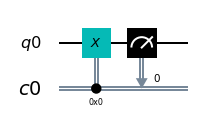

In [3]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw(output='mpl')

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)
# Here the classical bit always takes the value 0 so the qubit state is always flipped. 

{'1': 1024}

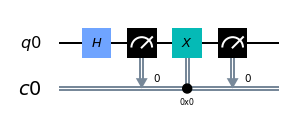

In [5]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw(output='mpl')

In [6]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)
# Here the classical bit by the first measurement is random 
# but the conditional operation results in the qubit being deterministically put into ||1⟩.

{'1': 1024}